In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install statsmodels


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import math
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

/var/folders/qr/zsq8kq3535s8kps239gxvv0m0000gn/T/ipykernel_44096/401392835.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# import the data .. Spx data
tickerSymbol = "^SPX"
start_date = datetime.date.today()- datetime.timedelta(days=730)
end_date = datetime.date.today()
data = yf.download(tickerSymbol,start = start_date , end = end_date)
close_price = data.Close
close_price

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Date
2022-02-07    4483.870117
2022-02-08    4521.540039
2022-02-09    4587.180176
2022-02-10    4504.080078
2022-02-11    4418.640137
                 ...     
2024-01-29    4927.930176
2024-01-30    4924.970215
2024-01-31    4845.649902
2024-02-01    4906.189941
2024-02-02    4958.609863
Name: Close, Length: 500, dtype: float64

In [5]:
# calculate returns
returns = close_price.pct_change().dropna()
returns

Date
2022-02-08    0.008401
2022-02-09    0.014517
2022-02-10   -0.018116
2022-02-11   -0.018969
2022-02-14   -0.003841
                ...   
2024-01-29    0.007557
2024-01-30   -0.000601
2024-01-31   -0.016106
2024-02-01    0.012494
2024-02-02    0.010684
Name: Close, Length: 499, dtype: float64

Text(0.5, 1.0, 'SPX500 Closing Price')

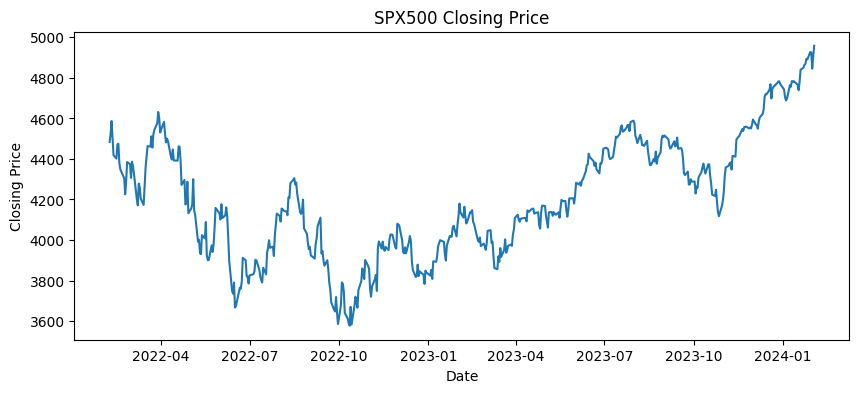

In [6]:
# plot the stock prices
plt.figure(figsize=(10,4))
plt.plot(close_price)
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.title("SPX500 Closing Price")

Text(0.5, 1.0, 'SPX500 Returns')

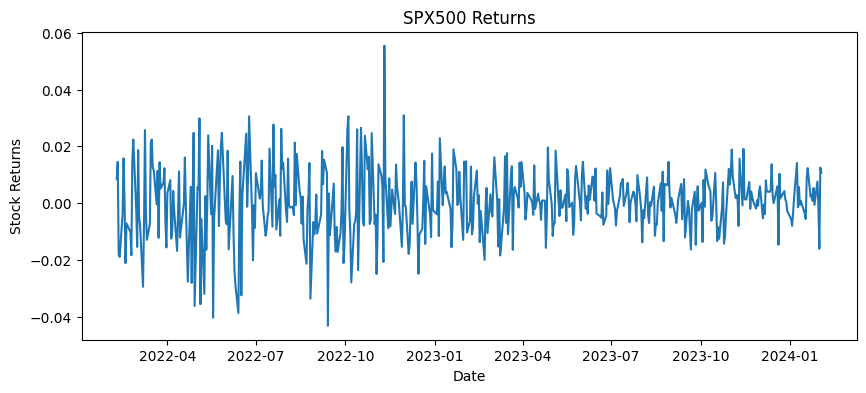

In [7]:
# plot returns
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Stock Returns")
plt.xlabel("Date")
plt.title("SPX500 Returns")

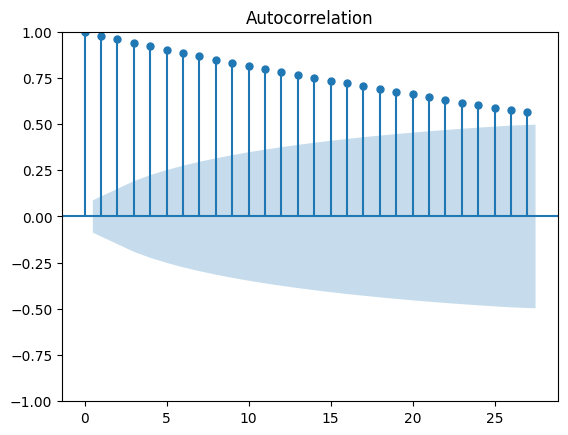

In [8]:
#plot acf
plot_acf(close_price)
plt.show()

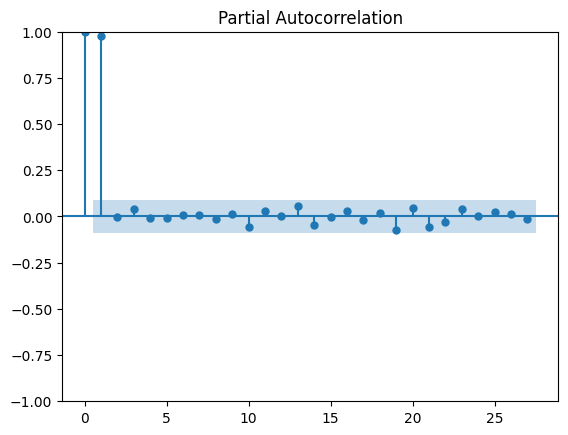

In [9]:
#plot pacf
plot_pacf(close_price, method='ywm')
plt.show()

In [10]:
# train test split
to_row = int(len(close_price)*0.9)
training_data = list(close_price[0:to_row])
testing_data= list(close_price[to_row:])

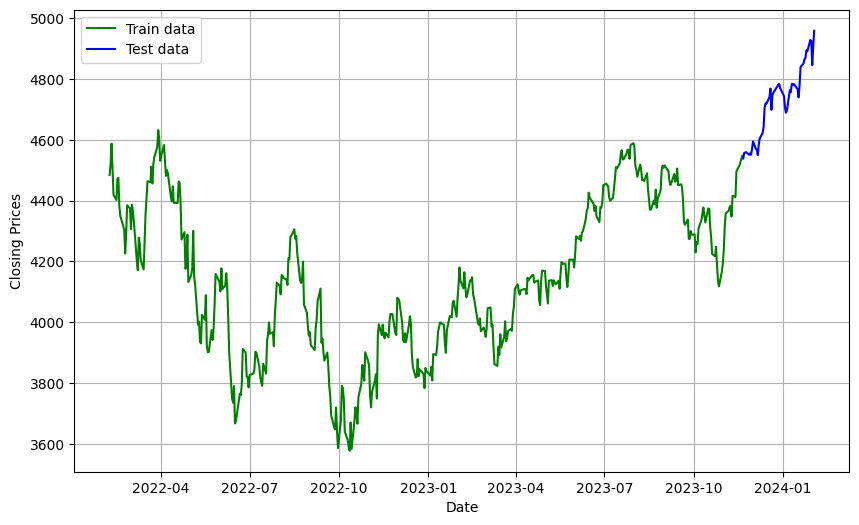

In [11]:
#graphing the train and test data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.plot(close_price[0:to_row],"green", label="Train data")
plt.plot(close_price[to_row:],"blue", label="Test data")
plt.legend()

In [12]:
# testing for optimal order parameters
import itertools

# define the range values for p,d,q
p = range(0,5)
d = range(0,5)
q = range(0,5)

#generate all possible combinations of p,d,q
pdq = list(itertools.product(p,d,q))

# variable to store best params and min aic
best_aic = float("inf")
best_pdq = None

# iterate through all combinations of arima models
for params in pdq:
  try:
    model = ARIMA(close_price,order = params)
    results = model.fit()
    if results.aic < best_aic:
      best_aic = results.aic
      best_pdq = params
  except:
    continue

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information an

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information an

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameter

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information an

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameter

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information an

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameter

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameter

In [13]:
# building the model
model_predictions = []
n_test_obser = len(testing_data)

In [14]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = best_pdq)
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  499
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -2646.584
Date:                Mon, 05 Feb 2024   AIC                           5297.167
Time:                        22:03:39   BIC                           5305.584
Sample:                             0   HQIC                          5300.471
                                - 499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9957      0.015    -68.092      0.000      -1.024      -0.967
sigma2      2446.0613    127.015     19.258      0.000    2197.116    2695.007
Ljung-Box (L1) (Q):                   0.06   Jarque-

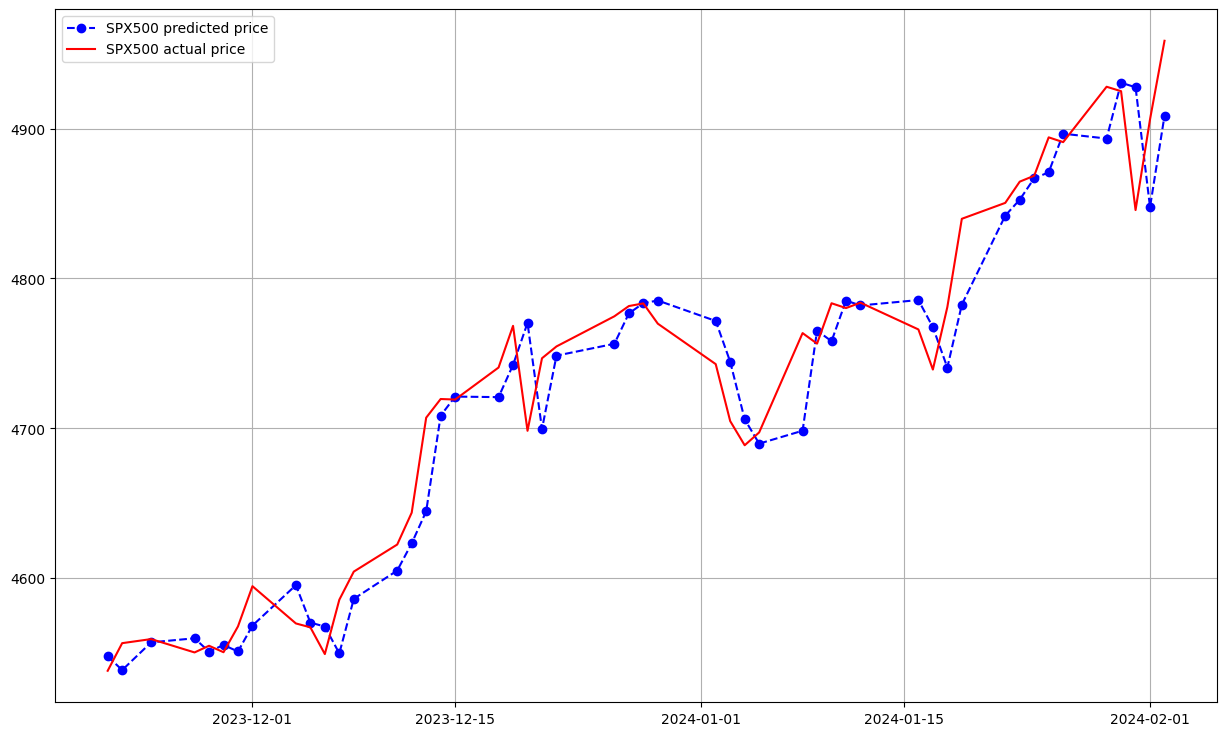

In [16]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range = close_price[to_row:].index
plt.plot(date_range, model_predictions, color="blue", marker="o", linestyle="dashed", label = "SPX500 predicted price")
plt.plot(date_range, testing_data, color="red", label = "SPX500 actual price")
plt.legend()
plt.show()

In [17]:
# MAE
mae = mean_absolute_error(testing_data, model_predictions)
print(f"The ARIMA model's MAE is {mae}")
#RMSE
rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print(f"The ARIMA model's RMSE is {rmse}")

The ARIMA model's MAE is 22.849105802491138
The ARIMA model's RMSE is 30.50241806942654


In [18]:
model_predictions

[[4547.876190814569],
 [4538.641917592394],
 [4557.14928134053],
 [4559.876746351126],
 [4550.921874612604],
 [4555.396682897524],
 [4551.062329497509],
 [4568.354834179944],
 [4595.31348275436],
 [4570.331670716232],
 [4567.714749733179],
 [4549.7914432533835],
 [4586.198186422812],
 [4605.068295188804],
 [4623.229911159645],
 [4644.609218573456],
 [4708.444496853729],
 [4721.173365122229],
 [4720.797512996196],
 [4742.309326252766],
 [4770.319563425212],
 [4699.5463096523345],
 [4748.475091529661],
 [4756.397179662693],
 [4776.654225627475],
 [4783.519387361224],
 [4785.284108423525],
 [4771.640180440457],
 [4744.4274521855405],
 [4706.015492466042],
 [4689.775672148561],
 [4698.37708901578],
 [4765.219896742739],
 [4758.114325861994],
 [4785.23536222137],
 [4781.98528193104],
 [4785.584819985058],
 [4767.484774335297],
 [4740.520179860935],
 [4782.517689939819],
 [4841.904673516658],
 [4852.587022923706],
 [4866.848771605835],
 [4870.808756757069],
 [4896.60691865543],
 [4893.365695

In [19]:
from joblib import Parallel, delayed
from threading import Thread
class CustomThread(Thread):
    def __init__(self, group=None, target=None, name=None,
                 args=(), kwargs={}, Verbose=None):
        Thread.__init__(self, group, target, name, args, kwargs)
        self._return = None

    def run(self):
        if self._target is not None:
            self._return = self._target(*self._args, **self._kwargs)

    def join(self, *args):
        Thread.join(self, *args)
        return self._return

In [20]:
def get_portfolio_data():
  # backtesting arima on portfolio of stocks
  stock_tickers = ["AAPL","MSFT","META","GOOG","NFLX","TSLA", "NVDA"]
  portfolio_data = []
  for ticker in stock_tickers:
    portfolio_data.append(yf.download(ticker, start = "2021-01-01", end = "2024-01-01").Close)
  portfolio_df = pd.concat(portfolio_data, axis=1)
  portfolio_df.columns = stock_tickers
  return portfolio_df

In [21]:
def build_arima(data,col1):
  # train test split
  to_row = int(len(data)*0.25)
  training_data = list(data[0:to_row])
  testing_data= list(data[to_row:])
  bt_date = data[to_row:].index
  # building the model
  model_predictions = []
  n_test_obser = len(testing_data)

  for i in range(n_test_obser):
    model = ARIMA(training_data, order = best_pdq)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

  # creating a dataframe for test set and prediction values
  model_predictions = list(itertools.chain.from_iterable(model_predictions))
  bt_df = pd.DataFrame({col1:testing_data,"Model_Pred":model_predictions},index=bt_date)
  return bt_df

def calc_returns(ticker):
  cap = 100000 * (1/7)
  port_df = get_portfolio_data()
  buy_counter = 0
  signals = []
  data = build_arima(port_df[ticker],"CLOSING_PRICE")
  data["Model_Pred_MA"] = data["Model_Pred"].rolling(window=10).mean()

  for i in range(len(data)):
    if (data.iloc[i,1] > data.iloc[i,0]) & (data.iloc[i,0] < data.iloc[i,-1]) &(buy_counter == 0):
      signals.append("Buy")
      buy_counter += 1

    elif(data.iloc[i,1] < data.iloc[i,0]) & (data.iloc[i,0] > data.iloc[i,-1])&(buy_counter > 0):
      signals.append("Sell")
      buy_counter -= 1

    else:
      signals.append(np.nan)

  data["Trading_Signals"] = signals
  data = data.dropna()
  buy_data = list(data[data["Trading_Signals"]== "Buy"]["CLOSING_PRICE"])
  sell_data = list(data[data["Trading_Signals"]== "Sell"]["CLOSING_PRICE"])

  if len(buy_data) > len(sell_data):
    buy_data.pop()
    buy_index = data[data["Trading_Signals"]== "Buy"]["CLOSING_PRICE"].index
    buy_index.pop()
  sell_dates = data[data["Trading_Signals"]== "Sell"]["CLOSING_PRICE"].index
  sell_data = sell_data.reset_index()
  returns_list = [((sell - buy) / buy) * 100 for buy, sell in zip(buy_data,sell_data)]
  returns_df = pd.DataFrame(returns_list, columns = [f"Trade_Returns_{ticker}"], index = buy_index)
  returns_df = returns_df.round(2)
  returns_df[f"Buy_Price_{ticker}"] = data[data["Trading_Signals"]== "Buy"]["CLOSING_PRICE"]
  returns_df[f"Number_Of_Shares_{ticker}"] = cap/ returns_df[f"Buy_Price_{ticker}"]
  return  returns_df

def get_trade_log():
  trades = []
  stock_tickers = ["AAPL","MSFT","META","GOOG","NFLX","TSLA", "NVDA"]
  for ticker in stock_tickers:
    trades.append(calc_returns(ticker))
  return trades



In [22]:
def get_port_returns(ticker):
  port_df = get_portfolio_data()
  buy_counter = 0
  signals = []
  data = build_arima(port_df[ticker],"CLOSING_PRICE")
  data["Model_Pred_MA"] = data["Model_Pred"].rolling(window=60).mean()

  for i in range(len(data)):
    if (data.iloc[i,1] > data.iloc[i,0]) & (data.iloc[i,0] < data.iloc[i,-1]) &(buy_counter == 0):
      signals.append("Buy")
      buy_counter += 1

    elif(data.iloc[i,1] < data.iloc[i,0]) & (data.iloc[i,0] > data.iloc[i,-1])&(buy_counter > 0):
      signals.append("Sell")
      buy_counter -= 1

    else:
      signals.append(np.nan)

  data["Trading_Signals"] = signals
  data = data.dropna()
  buy_data = list(data[data["Trading_Signals"]== "Buy"]["CLOSING_PRICE"])
  sell_data = list(data[data["Trading_Signals"]== "Sell"]["CLOSING_PRICE"])

  returns_list = [((sell - buy) / buy) * 100 for buy, sell in zip(buy_data,sell_data)]
  return sum(returns_list)

def total_return():
  tickers = ["AAPL","MSFT","META","GOOG","NFLX","TSLA", "NVDA"]
  vals = Parallel(n_jobs=-1)(delayed(get_port_returns)(stock) for stock in tickers)
  tl_return = sum(vals)
  return tl_return

In [23]:
calc_returns("AAPL")

/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/ritenbhagra/miniconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***

AttributeError: 'DatetimeIndex' object has no attribute 'pop'